In [424]:
import pandas as pd
import numpy as np
import pandas_ta as ta
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt
from copy import deepcopy

In [425]:
ts = TimeSeries(key='IX5ZSV7I3UUZ3I5B', output_format='csv')

In [426]:
from time import sleep

In [427]:
data_reader, _ = ts.get_daily_adjusted('F', outputsize='full')
df = pd.DataFrame(data_reader)
df, df.columns = df[1:] , df.iloc[0]

In [428]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.set_index('timestamp')

In [429]:
df.ta.indicators()

Pandas TA - Technical Analysis Indicators - v0.2.23b0
Total Indicators: 123
Abbreviations:
    aberration, above, above_value, accbands, ad, adosc, adx, amat, ao, aobv, apo, aroon, atr, bbands, below, below_value, bias, bop, brar, cci, cdl_doji, cdl_inside, cfo, cg, chop, cksp, cmf, cmo, coppock, cross, cross_value, decay, decreasing, dema, donchian, dpo, efi, ema, entropy, eom, er, eri, fisher, fwma, ha, hilo, hl2, hlc3, hma, ichimoku, increasing, inertia, kama, kc, kdj, kst, kurtosis, linreg, log_return, long_run, macd, mad, massi, median, mfi, midpoint, midprice, mom, natr, nvi, obv, ohlc4, pdist, percent_return, pgo, ppo, psar, psl, pvi, pvo, pvol, pvt, pwma, qstick, quantile, rma, roc, rsi, rvgi, rvi, short_run, sinwma, skew, slope, sma, smi, squeeze, stdev, stoch, stochrsi, supertrend, swma, t3, tema, thermo, trend_return, trima, trix, true_range, tsi, ttm_trend, ui, uo, variance, vortex, vp, vwap, vwma, wcp, willr, wma, zlma, zscore


In [430]:
# df = df[['open','high','low','close','volume','adjusted_close']]
df = df.rename(columns={'adjusted_close':'adj_close'})

In [431]:
for c in df.columns:
    df[c] = pd.to_numeric(df[c])

In [432]:
df = df.sort_index()

In [433]:
df.head()

0            open   high    low  close  adj_close   volume  dividend_amount  \
timestamp                                                                     
1999-11-01  55.00  55.88  54.44  54.63  23.210725  2377849              0.0   
1999-11-02  55.00  56.13  54.38  54.38  23.104507  2111458              0.0   
1999-11-03  54.44  54.69  53.13  53.75  22.836838  2838765              0.0   
1999-11-04  54.00  54.19  53.06  53.06  22.543677  2207702              0.0   
1999-11-05  53.63  54.31  53.13  53.69  22.811346  2264481              0.0   

0           split_coefficient  
timestamp                      
1999-11-01                1.0  
1999-11-02                1.0  
1999-11-03                1.0  
1999-11-04                1.0  
1999-11-05                1.0

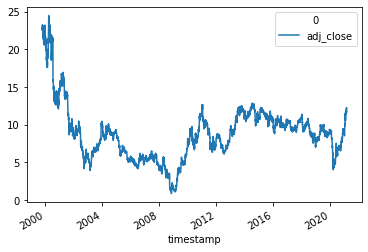

In [434]:
df[['adj_close']].plot()

In [435]:
df.ta.adjusted = "adj_close"
df['RSI'] = df.ta.rsi(14)

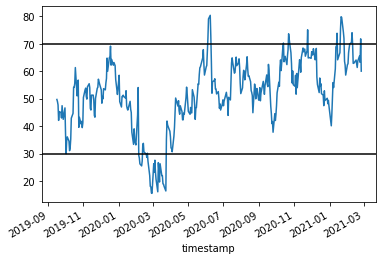

In [471]:
df['RSI'].iloc[-365:].plot()
plt.axhline(y=70, c='black')
plt.axhline(y=30, c='black')

In [467]:
x = [1,2,3,4]
x[:3]

[1, 2, 3]

In [468]:
def calc_srsi_period(period):
    def calc_srsi(x):
        prev_period_rsis = x[:period-1]
        curr_rsi = x[-1]
        min_rsi = np.min(prev_period_rsis)
        max_rsi = np.max(prev_period_rsis)

        return np.clip((curr_rsi - min_rsi)/(max_rsi - min_rsi), a_min=0, a_max=1)
    
    return calc_srsi

df['SRSI'] = df['RSI'].rolling(15).apply(calc_srsi_period(15), raw=True)

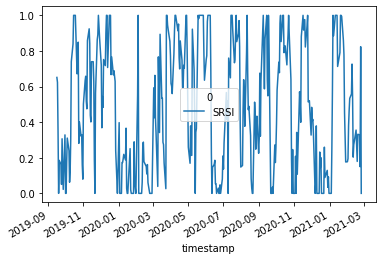

In [470]:
df[['SRSI']].iloc[-365:].plot()

In [439]:
df = df.dropna()

In [440]:
df

0            open   high    low  close  adj_close    volume  dividend_amount  \
timestamp                                                                      
1999-11-22  50.63  51.38  50.25  50.69  21.536732   3763526              0.0   
1999-11-23  51.00  51.06  50.50  50.50  21.456006   3111076              0.0   
1999-11-24  50.50  51.88  50.13  51.56  21.906370   2948186              0.0   
1999-11-26  51.50  51.56  50.63  50.63  21.511240    945130              0.0   
1999-11-29  50.44  51.56  50.31  51.31  21.800152   3204965              0.0   
...           ...    ...    ...    ...        ...       ...              ...   
2021-02-19  11.52  11.59  11.46  11.58  11.580000  48615552              0.0   
2021-02-22  11.52  11.94  11.50  11.70  11.700000  61488780              0.0   
2021-02-23  11.59  11.65  11.13  11.62  11.620000  72904530              0.0   
2021-02-24  11.67  12.40  11.64  12.27  12.270000  95152783              0.0   
2021-02-25  12.22  12.40  11.72  11.76  11.760000  74495019              0.0   

0           split_coefficient        RSI      SRSI  
timestamp                                           
1999-11-22                1.0  26.848837  0.474639  
1999-11-23                1.0  26.006340  0.459745  
1999-11-24                1.0  37.743530  0.667238  
1999-11-26                1.0  32.824007  0.274646  
1999-11-29                1.0  39.076797  0.465672  
...                       ...        ...       ...  
2021-02-19                1.0  63.698162  0.331866  
2021-02-22                1.0  65.507795  0.328754  
2021-02-23                1.0  63.244314  0.150034  
2021-02-24                1.0  71.777142  0.823769  
2021-02-25                1.0  60.006316  0.000000  

[5349 rows x 10 columns]

In [441]:
spy_10_year = df.copy()[df.index >= '02-25-2011']

In [442]:
spy_10_year.head()

0            open   high    low  close  adj_close    volume  dividend_amount  \
timestamp                                                                      
2011-02-25  14.94  15.11  14.85  15.07  10.171709  78341600              0.0   
2011-02-28  15.29  15.29  14.89  15.05  10.158210  54120000              0.0   
2011-03-01  15.10  15.12  14.60  14.66   9.894974  74337200              0.0   
2011-03-02  14.66  14.89  14.62  14.66   9.894974  67127000              0.0   
2011-03-03  14.90  14.95  14.66  14.76   9.962470  66720400              0.0   

0           split_coefficient        RSI      SRSI  
timestamp                                           
2011-02-25                1.0  35.313799  0.412776  
2011-02-28                1.0  35.119385  0.400971  
2011-03-01                1.0  31.479943  0.179980  
2011-03-02                1.0  31.479943  0.179980  
2011-03-03                1.0  33.528409  0.304365

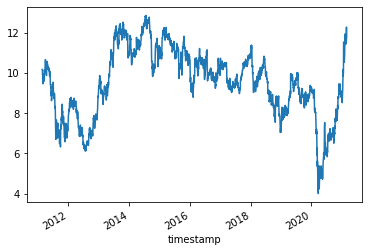

In [443]:
spy_10_year['adj_close'].plot()

In [444]:
def calc_return(share_lots, curr_price, days_held):
    basis_value = 0
    end_value = 0
    total_shares = 0
    for lot in share_lots:
        basis_value += lot['shares']*lot['basis']
        end_value += lot['shares']*curr_price
        total_shares += lot['shares']
        
    cumu_gain = (end_value/basis_value)-1
    annu_gain = (1 + cumu_gain)**(365/days_held) - 1
    
    return {
        'basis_value': round(basis_value,2),
        'end_value': round(end_value,2),
        'cumu_gain': round(cumu_gain,3),
        'annu_gain': round(annu_gain,3),
        'total_shares': round(total_shares,3),
        'days_held': days_held,
    }

In [445]:
share_lots = [
    {
        'date': 'date',
        'shares': 2,
        'basis': 150
    },
    {
        'date':'date',
        'shares': 2,
        'basis': 220
    }
]

In [446]:
calc_return(share_lots, 240, 1000)

{'basis_value': 740,
 'end_value': 960,
 'cumu_gain': 0.297,
 'annu_gain': 0.1,
 'total_shares': 4,
 'days_held': 1000}

In [447]:
# Investment Config
monthly_investment = 500
weekly_investment = round(monthly_investment*12/52, 2)
daily_investment = round(monthly_investment*12/365.25, 2)

In [448]:
monthly_investment, weekly_investment, daily_investment

(500, 115.38, 16.43)

In [457]:
def dca_monthly(ts, monthly_investment, day_of_month=20):
    date_range = pd.date_range(ts.index[0], ts.index[-1])
    dca_share_lots = []
    ready_to_invest = 0
    for date in date_range:
        if date.day == day_of_month:
            ready_to_invest = monthly_investment

        if date in ts.index and ready_to_invest > 0:
            dca_share_lots.append({
                'date': date,
                'shares': ready_to_invest/ts.loc[date]['adj_close'],
                'basis': ts.loc[date]['adj_close']
            })
            ready_to_invest = 0

    return calc_return(dca_share_lots, ts.iloc[-1]['adj_close'], (ts.index[-1] - ts.index[0]).days)

In [458]:
def dca_weekly(ts, monthly_investment, day_of_week=2):
    weekly_investment = round(monthly_investment*12/52, 2)
    date_range = pd.date_range(ts.index[0], ts.index[-1])
    dca_share_lots = []
    ready_to_invest = 0
    for date in date_range:
        if date.dayofweek == day_of_week:
            ready_to_invest = weekly_investment

        if date in ts.index and ready_to_invest > 0:
            dca_share_lots.append({
                'date': date,
                'shares': ready_to_invest/ts.loc[date]['adj_close'],
                'basis': ts.loc[date]['adj_close']
            })
            ready_to_invest = 0

    return calc_return(dca_share_lots, ts.iloc[-1]['adj_close'], (ts.index[-1] - ts.index[0]).days)

In [459]:
def dca_daily(ts, monthly_investment):
    daily_investment = round(monthly_investment*12/365.25, 2)
    date_range = pd.date_range(ts.index[0], ts.index[-1])
    dca_share_lots = []
    for date in date_range:
        if date in ts.index:
            dca_share_lots.append({
                'date': date,
                'shares': daily_investment/ts.loc[date]['adj_close'],
                'basis': ts.loc[date]['adj_close']
            })

    return calc_return(dca_share_lots, ts.iloc[-1]['adj_close'], (ts.index[-1] - ts.index[0]).days)

In [460]:
ts = df.copy()[['adj_close']]

In [461]:
print(dca_monthly(ts, monthly_investment))
print(dca_weekly(ts, monthly_investment))
print(dca_daily(ts, monthly_investment))

{'basis_value': 127500.0, 'end_value': 215715.16, 'cumu_gain': 0.692, 'annu_gain': 0.025, 'total_shares': 18343.126, 'days_held': 7766}
{'basis_value': 128071.8, 'end_value': 213446.76, 'cumu_gain': 0.667, 'annu_gain': 0.024, 'total_shares': 18150.235, 'days_held': 7766}
{'basis_value': 87884.07, 'end_value': 146579.5, 'cumu_gain': 0.668, 'annu_gain': 0.024, 'total_shares': 12464.243, 'days_held': 7766}


In [454]:
ts = df.copy()[['adj_close','RSI','SRSI']]

In [455]:
def srsi_daily(ts, monthly_investment):
    daily_investment = round(monthly_investment*12/365.25, 2)
    date_range = pd.date_range(ts.index[0], ts.index[-1])
    share_lots = []
    balance = 0
    for date in date_range:
        # accrue daily investment each day poised for investment when SRSI strikes
        balance += daily_investment
        
        if date in ts.index and ts.loc[date]['SRSI'] <= 0.2:
            share_lots.append({
                'date': date,
                'shares': balance/ts.loc[date]['adj_close'],
                'basis': ts.loc[date]['adj_close']
            })
            balance = 0

    return calc_return(share_lots, ts.iloc[-1]['adj_close'], (ts.index[-1] - ts.index[0]).days)

In [456]:
print(srsi_daily(ts, monthly_investment))

{'basis_value': 127611.81, 'end_value': 212197.21, 'cumu_gain': 0.663, 'annu_gain': 0.024, 'total_shares': 18043.98, 'days_held': 7766}


In [421]:
ts.head()

0           adj_close        RSI      SRSI
timestamp                                 
1999-11-22   0.696846  61.714777  0.000000
1999-11-23   0.713686  65.414875  0.096646
1999-11-24   0.728143  68.251510  0.170738
1999-11-26   0.730988  68.793987  0.184907
1999-11-29   0.727143  67.124841  0.141309

In [422]:
results = dict()
strategies = [
    srsi_daily,
    dca_monthly,
    dca_weekly,
    dca_daily
]
monthly_investment = 500
ts_full_length = df.shape[0]
num_backtests = 100
trading_days_per_year = 253

for _ in range(num_backtests):
    years = np.random.rand() * (10 - 2) + 2 # 2 to 10 years
    trading_period = int(trading_days_per_year*years)
    start_day_idx = np.random.randint(ts_full_length-trading_period)
    end_day_idx = start_day_idx + trading_period
    ts = df.copy().iloc[start_day_idx:end_day_idx]
    
    for strategy in strategies:
            strategy_name = strategy.__name__
            if strategy_name not in results:
                results[strategy_name] = []

            results[strategy_name].append(strategy(ts, monthly_investment))

srsi_daily	-->	20.1% +/- 11.700000000000001% avg annualized return


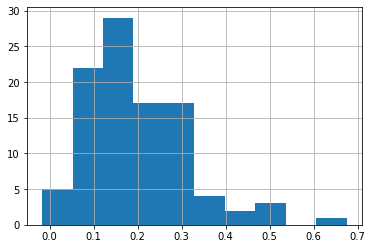

dca_monthly	-->	20.1% +/- 11.600000000000001% avg annualized return


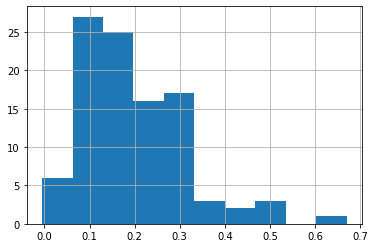

dca_weekly	-->	20.1% +/- 11.600000000000001% avg annualized return


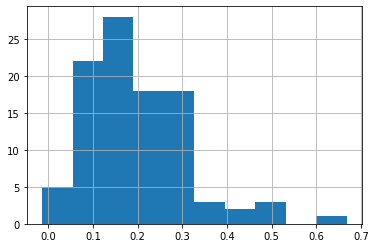

dca_daily	-->	20.1% +/- 11.600000000000001% avg annualized return


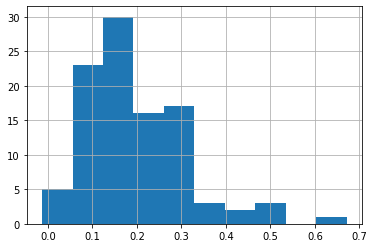

In [423]:
for strat,result in results.items():
    annu_gain = pd.DataFrame(results[strat])['annu_gain']
    avg_annu_return = round(annu_gain.mean(), 3)
    std_annu_return = round(annu_gain.std(), 3)
    print(f'{strat}\t-->\t{100*avg_annu_return}% +/- {100*std_annu_return}% avg annualized return')
    annu_gain.hist()
    plt.show()

In [472]:
# TODO
# Analyze avg number of days RSI <= 30 or >= 70
# Setup experiment like before where new money is being invested, but also incrementally or find good proportion to sell when RSI >= 70, then take out taxes and reinvest when dips below 30